#### <h1> <font color='blue'>The notebook is about the analysis of Covid cases in India </font></h1>

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import ployly libraries
import plotly.express as px
import plotly.graph_objects as go

# Disable warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Import library to create leaflet maps
import folium
from folium import plugins

# Change the default plot size
plt.rcParams['figure.figsize'] = 10, 12

## Read the datasets

In [8]:
df = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\CovidcasesinIndia.xlsx')

df_india = df.copy()

In [13]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [15]:
# Read the coordinates for Indian States

India_cord = pd.read_excel('D:\Study\DataScience\Data\MachineLearningData\CovidData\IndianCoordinates.xlsx')

In [17]:
# Read the day by day data for India, Korea, Italy and Wuhan

dbd_India = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'India')
dbd_Italy = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'Italy')
dbd_Korea = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'Korea')
dbd_Wuhan = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'Wuhan')

In [24]:
# Get the columns names
df.columns

# ['S. No.', 'Name of State / UT', 'Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )', 'Cured', 'Death']

# Remove 'S. No.' column

#df = df.drop(['S. No.'], axis = 1)

In [27]:
# Create new column as 'Total Cases' having sum of Indian and Foreign cases

df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

# Print the total number of Covid cases

total_cases = df['Total Cases'].sum()

print('Total number of Covid Cases are: {}'.format(total_cases))

Total number of Covid Cases are: 562


In [32]:
# Hightlight the dataframe

df.style.background_gradient(cmap='Greens')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [33]:
# Calculate total number of active cases across the states
# active cases = total cases - (recovered + deaths)

df['Total Active Cases'] = df['Total Cases'] - (df['Cured'] + df['Death'])

# Sum of total active cases
total_active_cases = df['Total Active Cases'].sum()
print('Total active cases across India are: {}'.format(total_active_cases))

Total active cases across India are: 512


In [35]:
# Group by states
Tot_Cases = df.groupby('Name of State / UT')['Total Active Cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Total Active Cases
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [39]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_cord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

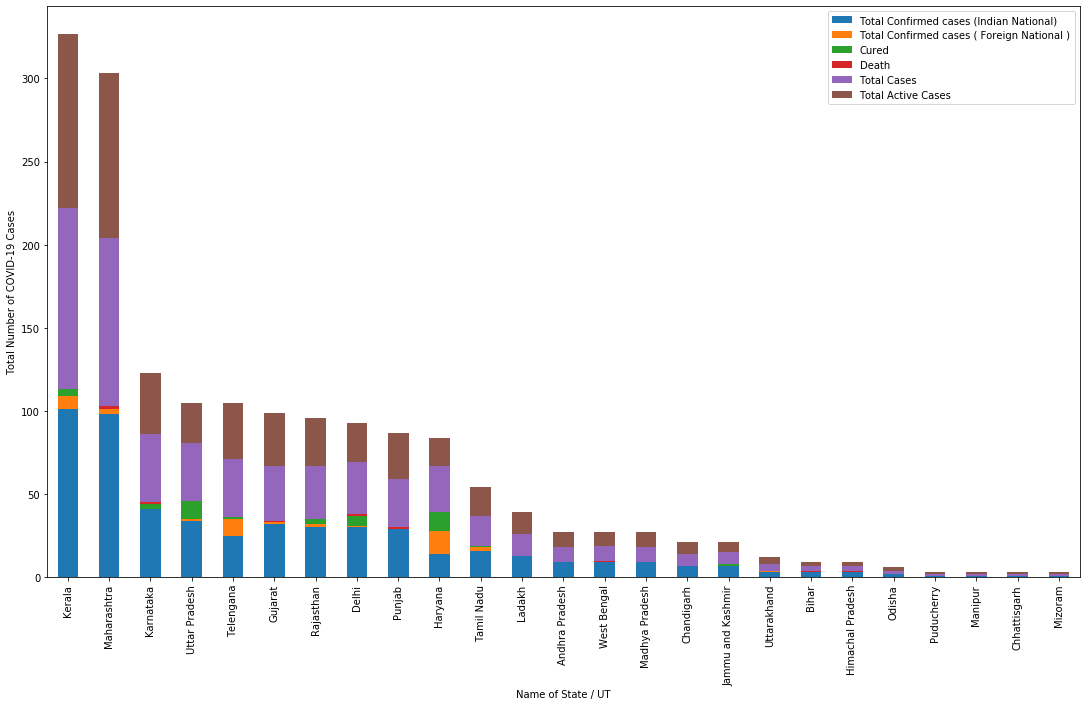

In [50]:
# Plot Stacked bar plot for total, cured and dead cases
# Set the index as States if it is not

data = df.copy()

#Oreder the dataframe by total number of cases
data_sorted = data.sort_values(by=['Total Cases'], ascending= False)
data_sorted.set_index('Name of State / UT', inplace = True)
ax = data_sorted.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('Total Number of COVID-19 Cases')
plt.show()

In [3]:
# Read cleaned csv for worldwide COVID cases per day
df_world = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\covid_19_clean_complete.csv', parse_dates=['Date'])

In [4]:
# Rename column 'Country/Region' as 'Country'
df_world = df_world.rename(columns={'Country/Region': 'Country'})

# Extracting cases only from India
df_India = df_world.query('Country=="India"').groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [5]:
df_India = df_India.iloc[:-1]

Text(0.5, 1.0, 'Covid cases across India')

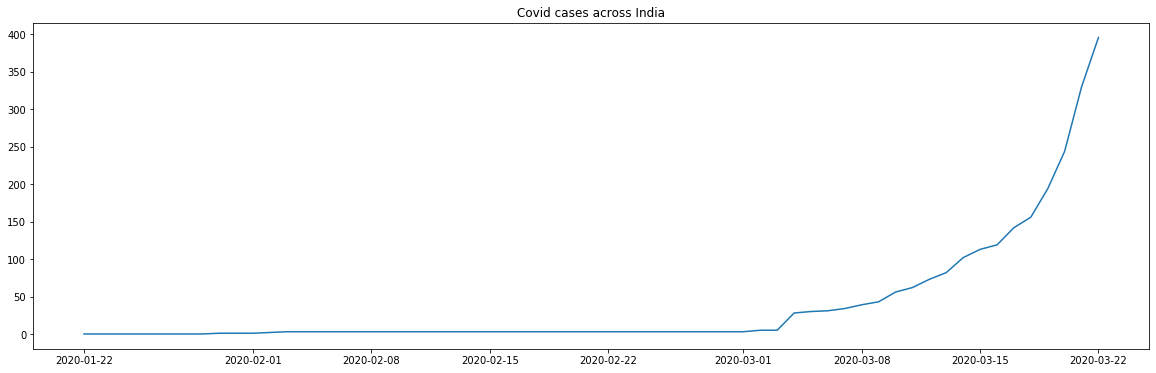

In [25]:
plt.figure(figsize=(20,6))
plt.plot(df_India['Date'], df_India['Confirmed'])
plt.title('Covid cases across India')

In [15]:
# Analyze the world wise trend of Covid Cases

df = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [18]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [19]:
# Visualizing worldwide cases

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

Text(0.5, 1.0, 'Covid cases across the world')

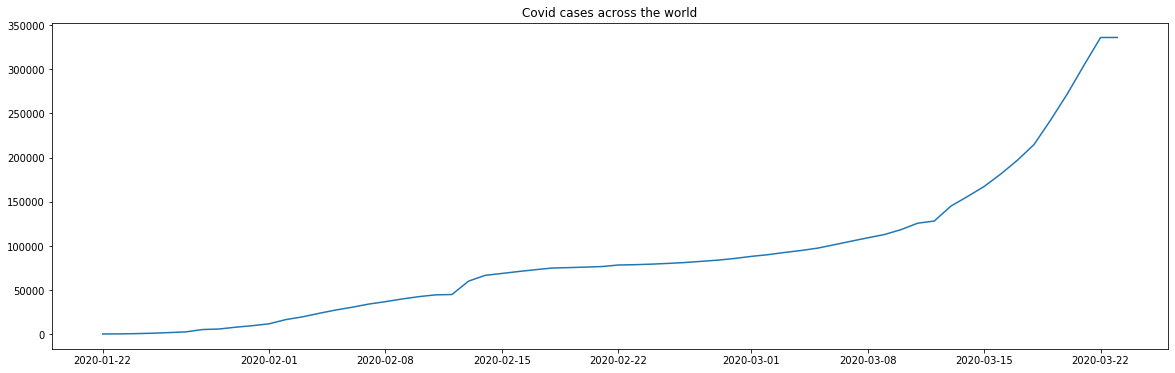

In [27]:
plt.figure(figsize=(20,6))
plt.plot(confirmed['Date'], confirmed['Confirmed'])
plt.title('Covid cases across the world')

In [29]:
confirmed = confirmed[:-1]

In [31]:
from fbprophet import Prophet

The input to Prophet is always a dataframe with two columns: **ds** and **y**. 
The **ds (datestamp)** column should be of a timestamp format.
The **y** column must be numeric, and represents the measurement we wish to forecast.

In [35]:
# The current 'confirmed dataframe has two columns - 'Date' and 'Confirmed'
# Rename the columns to 'ds' and 'y' as required by Prophet.
confirmed.columns = ['ds', 'y']

# Change the data type of 'ds' column to timestamp.
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [38]:
confirmed.tail()

,ds,y
56,2020-03-18,214910.0
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


In [40]:
# Create a future dataframe using Prophet to forecast for 7 periods in our case 7 days with 95% confidence interval
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29


In [42]:
# Forecast using future dataframe
forecast = m.predict(future)
forecast.tail()

# Select only ['ds', 'yhat', 'yhat_lower', 'yhat_upper'] columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
63,2020-03-25,316241.354193,291748.435077,341010.062773
64,2020-03-26,330542.658271,306707.031344,355514.137574
65,2020-03-27,345826.530147,322803.709415,371297.898222
66,2020-03-28,360451.981664,333957.657224,384970.793703
67,2020-03-29,375270.492214,350380.031979,402548.353694


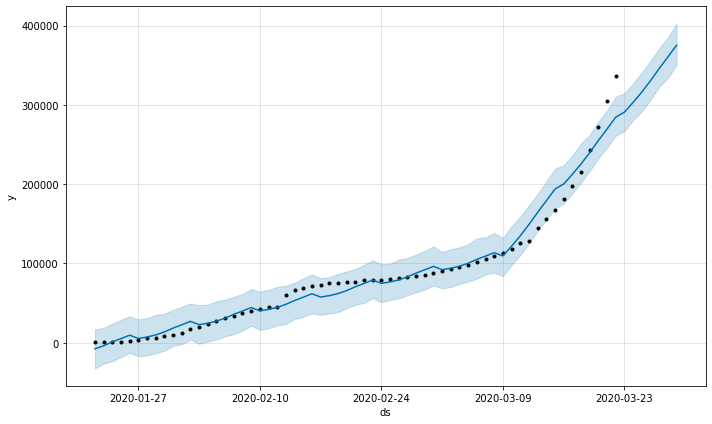

In [44]:
# Plot the forecast results
future_forecast_plot = m.plot(forecast)

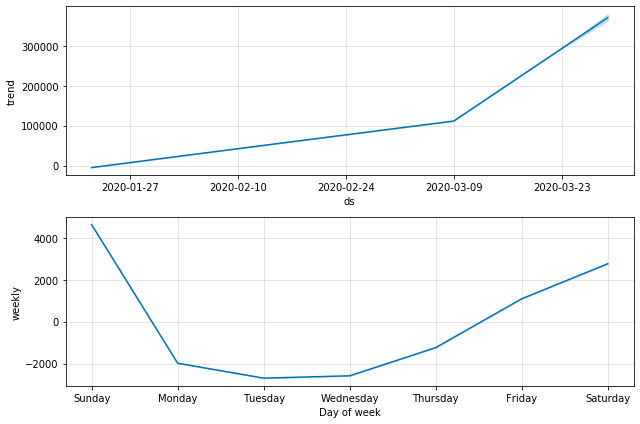

In [45]:
# Plot the components such as trend and/or seasonality of the forecast
confirmed_forecast_plot = m.plot_components(forecast)